# Exploratory analysis - validation of depreciation model

In [1]:
# set up working directory
import os
#os.chdir('/Users/pedrobaiz/src/Cars/scripts') 
sys.path.append('/Users/pedrobaiz/src/Cars/scripts')
module_dir = "../"
sys.path.append(module_dir)

# open listings dataframe
import pandas as pd
listings = pd.read_csv('../data/listings5.csv')
listings.columns

# get sorted data
make_model_list_sorted = pd.read_csv('../data/make_model_list_sorted.csv')

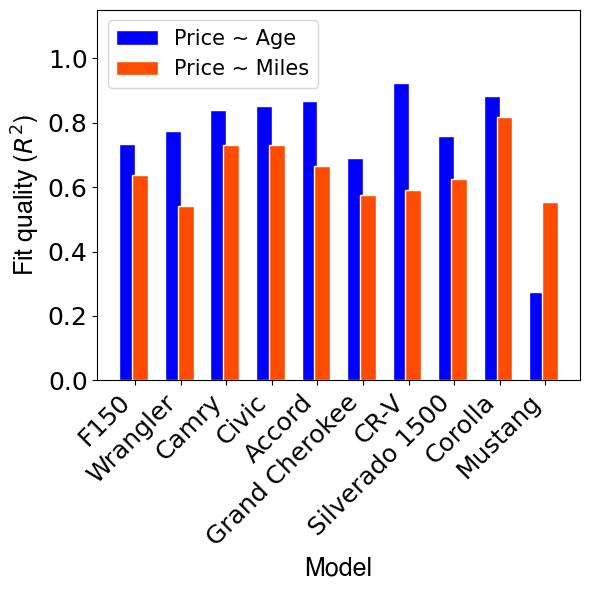

In [2]:
### PLOT R2 FOR 3 CHOICES OF DEPRECIATION MODELING ###

# import data, choose selection
fit_data = pd.read_csv('../data/depreciation/fit_data.csv')
selection = fit_data[:10]
selection.columns

# plot it
#from plotfunctions import plot_depr_R2
from scripts.datavisualization.plotfunctions_1 import plot_depr_R2
plot_depr_R2(selection)

In [3]:
### PLOT DEPRECIATION CURVES ###

listings_sorted = listings.groupby('Model').count().iloc[:,1].to_frame().rename(columns={'Make':'Counts'}).sort_values(by = 'Counts', ascending = False)
newerthan = 1995

# plot age depreciation curves for selected models
#from plotfunctions import plot_depr_age
from scripts.datavisualization.plotfunctions_1_FJ import plot_depr_age
b_lower = 0.05
alpha = 0.25

# selection = listings_sorted[:5]
# fit_data_age = pd.DataFrame()
# for counter, line in enumerate(selection.index,1):
#     model = line
#     counts = make_model_list_sorted[make_model_list_sorted['Model'] == model]['Count'].iloc[0]
#     fit_data_age = plot_depr_age(listings, model, newerthan, b_lower, counter, counts, alpha, save=False)

In [4]:
# set up working directory
import os
os.chdir('/Users/pedrobaiz/src/Cars/scripts') 

# open listings, model list, and depreciation dataframes
import pandas as pd
listings = pd.read_csv('../data/listings5.csv')
make_model_list_sorted = pd.read_csv('../data/make_model_list_sorted.csv')
depr_summary = pd.read_csv('../data/depreciation/depreciation_by_model_2.csv')

In [5]:
### USER INPUT ###

# list of available makes
make_choices = depr_summary['Make'].unique()

# (select one randomly)
import numpy as np
make_input = make_choices[np.random.randint(len(make_choices))]

# list of available models
model_choices = depr_summary[depr_summary['Make'] == make_input]['Model']

# (select one randomly)
model_input = model_choices.iloc[np.random.randint(len(model_choices))]

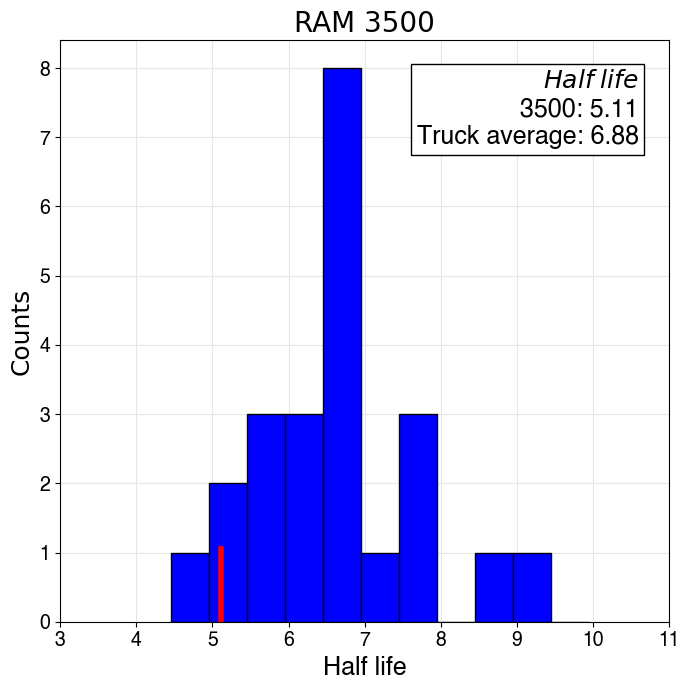

In [6]:
# get data from user choice
user_choice = depr_summary[depr_summary['Model'] == model_input]

# get segment of user choice
body = depr_summary[depr_summary['Model'] == model_input]['Body'].iloc[0]
segment = depr_summary[depr_summary['Body'] == body]

### HISTOGRAM PLOT: HALF LIFE ###
data_halflife = segment['Half life']
user_choice_halflife = user_choice['Half life'].iloc[0]

# textbox
segment_average = np.nanmean(data_halflife)
props = dict(facecolor='white', edgecolor='none', alpha=0.67)
line1 = '$Half$ $life$\n' + str(model_input) + ': %.2f\n' % user_choice['Half life'].iloc[0]
line2 = str(body) + ' average: %.2f' % segment_average                               
textbox = line1 + line2

import numpy as np
binwidth = .5
xmin = int(min(segment['Half life'])) - 1
xmax = int(max(segment['Half life'])) + 1
xlabel = 'Half life'
ylabel = 'Counts'
figure_name = '../images/Half_life_' + str(model_input) + '.png'

#from plotfunctions import plot_hist_hl
from scripts.datavisualization.plotfunctions_1 import plot_hist_hl
bins = plot_hist_hl(data_halflife, user_choice_halflife, make_input, model_input, binwidth, textbox, props, xmin, xmax, xlabel, ylabel, figure_name)